In [1]:
import ttvfast
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from ttvfast import models
import pdb



gravity =  0.000295994511                        # AU^3/day^2/M_sun
stellar_mass = 0.518 #0.95573417954    #change me                # M_sun


planet1 = models.Planet(
    mass=0.00954588, #0.00002878248,                         # M_sun
    period=1.4079405,#1.0917340278625494e+01,              # days
    eccentricity=0,#5.6159310042858110e-02,
    inclination=88.778,#9.0921164935951211e+01,         # degrees
    longnode=-1.1729336712101943e-18,           # degrees
    argument=1.8094838714599581e+02,            # degrees
    mean_anomaly= -90 #-8.7093652691581923e+01,       # degrees
)

planet2 = models.Planet(
    mass=0.00954588,#0.00061895914,
    period=200,#1.4079405,#2.2266898036209028e+01,
    eccentricity= 0.7, #5.6691301931178648e-02,
    inclination=8.7598285693573246e+01,
    longnode=4.6220554014026838e-01,
    argument=1.6437004273382669e+00,
    mean_anomaly=-1.9584857031843157e+01,
)

planets = [planet1, planet2]
Time = 66.70357200363651-1.4079405+0.003714472890699483 #-1045                                    # days
dt = 0.02                                       # days
Total = 510 #1700                                    # days

results = ttvfast.ttvfast(planets, stellar_mass, Time, dt, Total)
#print(results)

In [2]:
#print(results.keys())
#print(results["positions"][2])
whichplanet = results["positions"][0]
whichtransit = results["positions"][1]
transittimes = results["positions"][2]
planet1transits = []
planet1times = []
transittimesplanet0 = []
transitnumberplanet0 = []
for i in range(375):
    a = whichplanet[i]
    condition = a==0  
    if condition: 
        transittimesplanet0.append(transittimes[i] )
        transitnumberplanet0.append(whichtransit[i] )

In [3]:
# df=pd.read_csv(r'/Users/sarahkubiak/Desktop/WD1856/test.txt', sep=' ')
df=pd.read_csv(r'/Users/sarahkubiak/Desktop/WD1856/newdatawithoutbadthings.txt', sep=' ')
df

,Time,Uncertainty
0,2.459016e+06,0.000002
1,2.459033e+06,0.000002
2,2.459061e+06,0.000002
3,2.459085e+06,0.000002
4,2.459092e+06,0.000003
5,2.459095e+06,0.000009
6,2.459102e+06,0.000002
7,2.459116e+06,0.000003
8,2.459126e+06,0.000002
9,2.459140e+06,0.000003


In [4]:
brucetransittime=np.array(df['Time'])
#brucetransittime= 1.40794050*brucetransitnumber + 2458779.3750828
brucetransitnumber= np.round((brucetransittime-2458779.3750828)/1.40794050)
#brucex= brucetransitnumber
#brucey=np.array(df['dT[sec]'])
bruceerr= np.array(df['Uncertainty'])*60*60*24
#fig, ax = plt.subplots(figsize=(16, 8))

#plt.errorbar(brucex, brucey, yerr = bruceerr, fmt = 'o')
#ax.set_ylabel('seconds');
#ax.set_xlabel('transit number');

In [5]:
actualbrucetransittime = np.array(df['Time'])-2458700

In [6]:
print(actualbrucetransittime[0])

315.9088683668524


In [7]:
print(transittimesplanet0[0])

66.703572003636


In [8]:
actualbrucetransittime[14]-actualbrucetransittime[0]

-1.407952366862446

In [9]:
transittimesplanet0[0]- actualbrucetransittime[0]

-249.2052963632164

In [10]:
transittimesplanet0 = np.array(transittimesplanet0)
print(transittimesplanet0[np.array([0, 2, 5])])

[66.703572   69.51945347 73.74333002]


In [11]:
#for i in range(29):
    #print('datapoint number', i,'coresponds to transit time', transittimesplanet0[i] )
print(transittimesplanet0[9])
print(transittimesplanet0[157])
print(transittimesplanet0[174])
print(transittimesplanet0[311])
for i in range(14):
    print(' bruce transit number', brucetransitnumber[i],'coresponds to transit time', actualbrucetransittime[i] )
    #for j in range(len(transittimesplanet0)):
        #print(transittimesplanet0[i])
        #condition = actualbrucetransittime[i]==transittimesplanet0[i]
        #if condition: 
            #print(i)
transitswewant = (brucetransitnumber + 9)
transitswewant = (transitswewant.astype(int))
print(transitswewant)

79.37518705156312
287.74876840384854
311.6835128489974
504.56979627384464
 bruce transit number 168.0 coresponds to transit time 315.9088683668524
 bruce transit number 180.0 coresponds to transit time 332.80413679406047
 bruce transit number 200.0 coresponds to transit time 360.9629293610342
 bruce transit number 217.0 coresponds to transit time 384.8978941459209
 bruce transit number 222.0 coresponds to transit time 391.93759056413546
 bruce transit number 224.0 coresponds to transit time 394.753486501053
 bruce transit number 229.0 coresponds to transit time 401.793159971945
 bruce transit number 239.0 coresponds to transit time 415.87255670595914
 bruce transit number 246.0 coresponds to transit time 425.728129317984
 bruce transit number 256.0 coresponds to transit time 439.80752397188917
 bruce transit number 0.0 coresponds to transit time 79.37508499994874
 bruce transit number 94.0 coresponds to transit time 211.72136700013652
 bruce transit number 143.0 coresponds to transit t

In [12]:
print((np.array(transittimesplanet0)[transitswewant]-actualbrucetransittime) * 24 * 60 * 60)

[-136.33910311 -150.10416608 -174.18533778 -193.84287186 -199.66576359
 -203.4872703  -207.27673653 -218.92133172 -226.13875391 -231.69492244
    8.81725948  -89.71567339 -107.99827277 -115.55639567 -134.04587027]


In [13]:
chisq = np.sum(((actualbrucetransittime - np.array(transittimesplanet0)[transitswewant]) * 24 * 60 * 60)**2 / bruceerr**2)
print(chisq)

9020588.128618864


In [14]:
def loglikelihood(p, actualbrucetransittime, bruceerr, yesplot= False): #here p is an array of the parameters: let's define p[0] = slope, and p[1] = intercept
    #slope = p[0]
    #intercept = p[1]
    #quad = p[2]
    #model = slope*x + intercept+ quad*x**2
    #chisq = np.sum((y - model)**2 / e**2)
    
    gravity =  0.000295994511                        # AU^3/day^2/M_sun
    stellar_mass = 0.518 #0.95573417954    #change me                # M_sun


    planet1 = models.Planet(
        mass = 0.00954588, #0.00002878248,                         # M_sun
        period = p[7],#1.4079405,#1.0917340278625494e+01,              # days
        eccentricity = 0,#5.6159310042858110e-02,
        inclination = 20,#88.778,#9.0921164935951211e+01,         # degrees
        longnode = -1.1729336712101943e-18,           # degrees
        argument = 1.8094838714599581e+02,            # degrees
        mean_anomaly = p[8],#-90 #-8.7093652691581923e+01,       # degrees
    )

    planet2 = models.Planet(
        mass = p[0],#0.00954588,#0.00061895914,
        period = p[1],#200,#1.4079405,#2.2266898036209028e+01,
        eccentricity = p[2],#0.7, #5.6691301931178648e-02,
        inclination = p[3],#8.7598285693573246e+01,
        longnode = p[4],#4.6220554014026838e-01,
        argument = p[5],#1.6437004273382669e+00,
        mean_anomaly = p[6],#-1.9584857031843157e+01,
    )

    planets = [planet1, planet2]
    Time = 66.70357200363651-1.4079405+0.003714472890699483 #-1045                                    # days
    dt = 0.02                                       # days
    Total = 600 #1700                                    # days

    results = ttvfast.ttvfast(planets, stellar_mass, Time, dt, Total)
    whichplanet = results["positions"][0]
    whichtransit = results["positions"][1]
    transittimes = results["positions"][2]
    planet1transits = []
    planet1times = []
    transittimesplanet0 = []
    transitnumberplanet0 = []
    for i in range(375):
        a = whichplanet[i]
        condition = a == 0  
        if condition: 
            transittimesplanet0.append(transittimes[i] )
            transitnumberplanet0.append(whichtransit[i] )
    
    
    if yesplot: 
        fig, ax = plt.subplots(figsize=(16, 8))
    #m=np.mean((actualbrucetransittime-1.4079405*brucetransitnumber)*24*60*60)
    #model data- model line 
    #plt.errorbar(brucetransitnumber, (actualbrucetransittime-1.4079405*brucetransitnumber)*24*60*60-m, yerr = bruceerr, fmt = 'o-', label = 'Data')
    #print(actualbrucetransittime)
    #print(np.array(transittimesplanet0)[transitswewant])
    #bruce data- model line 
    #plt.plot(brucetransitnumber, (np.array(transittimesplanet0)[transitswewant]-1.4079405*brucetransitnumber)*24*60*60-m,"o-", label = 'Model')
    #ax.set_ylabel('seconds');
    '''ax.set_xlabel('transit number');
    ax.set_title('mass = '+ str(p[0])+ ' period ='+ str(p[1]))
    plt.show()'''
    '''print(np.array(transittimesplanet0)[transitswewant[0:5]])
    print(actualbrucetransittime[0:5])'''
    #pdb.set_trace()
    pbruce = np.polyfit(brucetransitnumber,actualbrucetransittime,1, w= 1/bruceerr)
    pmodel = np.polyfit(brucetransitnumber,np.array(transittimesplanet0)[transitswewant],1,w= 1/bruceerr)
    brucetrend = np.polyval(pbruce,brucetransitnumber)
    modeltrend = np.polyval(pmodel,brucetransitnumber)
    brucetransittimecorrected = actualbrucetransittime - brucetrend
    modeltransittimecorrected = np.array(transittimesplanet0)[transitswewant] - modeltrend
    if yesplot:
        plt.errorbar(brucetransitnumber,brucetransittimecorrected*60*60*24, yerr = bruceerr, fmt = 'o-', label = 'Corrected Data')
        print(actualbrucetransittime)
        print(np.array(transittimesplanet0)[transitswewant])
        #bruce data- model line 
        plt.plot(brucetransitnumber, modeltransittimecorrected*60*60*24,"o-", label = 'Corrected Model')
        ax.set_ylabel('seconds');
        ax.set_xlabel('transit number');
        ax.set_title('ecentricity = '+ str(p[2])+ ' inclination ='+ str(p[3])+ 'mean anomoly ='+ str(p[6])) 
        plt.show()
    chisq = np.sum((brucetransittimecorrected*60*60*24 - modeltransittimecorrected*60*60*24)**2/ bruceerr**2)
    #print(brucetransittimecorrected*60*60*24 - modeltransittimecorrected*60*60*24)
    #print(bruceerr)
    negloglikelihood = 0.5 * chisq
    return negloglikelihood


In [15]:
loglikelihood([0.00954588,200,0.6,8.7598285693573246e+01,4.6220554014026838e-01,1.6437004273382669e+00,-1.9584857031843157e+01,1.40795,-90],actualbrucetransittime , bruceerr)

849.3221498613184

In [16]:
print(brucetransitnumber)


[168. 180. 200. 217. 222. 224. 229. 239. 246. 256.   0.  94. 143. 150.
 167.]


In [17]:
#grid search 
ecentricitiestotest = np.linspace(0,0.7,100)
inclinationstotest = np.linspace(0,90,100)#/1047.572 #conversion from jupiter to solar masses
meananomolytotest = np.linspace(0,360,100)
''''for j in range(len(massestotest)):
        thismass= massestotest[j]
        for k in range(len(periodstotest)):
            thisperiod= periodstotest[k]
            for m in range(len(meananomolytotest)):
                thismeananomoly= meananomolytotest[m]
                loglikelihood([thismass,
                           thisperiod,0.6,
                           8.7598285693573246e+01,
                           4.6220554014026838e-01,
                           1.6437004273382669e+00,
                           thismeananomoly,
                           1.40795,-90],actualbrucetransittime , bruceerr)'''


"'for j in range(len(massestotest)):\n        thismass= massestotest[j]\n        for k in range(len(periodstotest)):\n            thisperiod= periodstotest[k]\n            for m in range(len(meananomolytotest)):\n                thismeananomoly= meananomolytotest[m]\n                loglikelihood([thismass,\n                           thisperiod,0.6,\n                           8.7598285693573246e+01,\n                           4.6220554014026838e-01,\n                           1.6437004273382669e+00,\n                           thismeananomoly,\n                           1.40795,-90],actualbrucetransittime , bruceerr)"

In [18]:
#for j in range(len(meananomolytotest)):
   # print(j)
   # print('loop finished')
   # print(meananomolytotest[j])

In [19]:
a=np.zeros((len(ecentricitiestotest),len(inclinationstotest),len(meananomolytotest)))
#print(a)
for c in range(len(ecentricitiestotest)): 
    for d in range(len(inclinationstotest)):
        for e in range(len(meananomolytotest)):
            #print(c,d,e)
            a[c,d,e]=loglikelihood([1/1047.572,130,ecentricitiestotest[c],inclinationstotest[d],
                                               4.6220554014026838e-01,1.6437004273382669e+00,
                                               meananomolytotest[e],1.40795,-90],actualbrucetransittime , bruceerr)
#print(a)


In [20]:

#c= 28
#d= 16
#e= 29
#print(loglikelihood([0.02,130,ecentricitiestotest[c],inclinationstotest[d],
                                               #4.6220554014026838e-01,1.6437004273382669e+00,
                                               #meananomolytotest[e],1.40795,-90],actualbrucetransittime , bruceerr))
#print(ecentricitiestotest[c])

Text(0.5, 0, 'ecentricity')

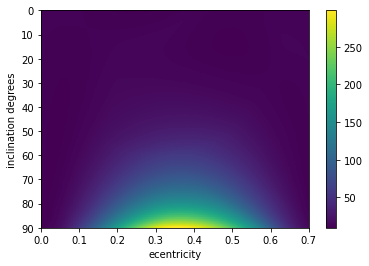

In [21]:
fig,ax= plt.subplots()
im=ax.imshow(np.min(a, axis= 2),extent = [min(ecentricitiestotest), max(ecentricitiestotest),max(inclinationstotest),min(inclinationstotest)], aspect='auto')

fig.colorbar(im)
ax.set_ylabel('inclination degrees')
ax.set_xlabel('ecentricity')


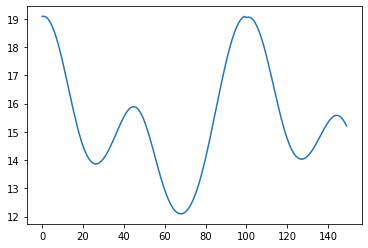

In [22]:
plt.plot(np.resize(a, 5*5*6))

In [23]:
np.savez("bigecentricitiestwo.npz",a=a,ecentricitiestotest=ecentricitiestotest,inclinationstotest=inclinationstotest, meananomolytotest=meananomolytotest)

In [24]:
f=np.load('bigecentricitiestwo.npz')
a = f["a"]
#ecentricities = f['massestotest']
#periodstotest = f['periodstotest']

In [25]:
print(f["a"])

[[[ 19.0850218   19.09234246  19.05988798 ...  18.95411169  19.03858043
    19.0850218 ]
  [ 19.04689071  19.06491957  19.04532613 ...  18.90125058  18.99196403
    19.04689071]
  [ 19.0186372   19.04657093  19.0390516  ...  18.85981076  18.95601014
    19.0186372 ]
  ...
  [ 15.1089682   14.85723174  14.59176477 ...  15.55395527  15.34258621
    15.1089682 ]
  [ 15.43479296  15.17340636  14.89516289 ...  15.88897273  15.67475362
    15.43479296]
  [ 15.77432749  15.50391387  15.21335248 ...  16.23597023  16.01983238
    15.77432804]]

 [[ 19.08862848  19.09080407  19.05265847 ...  18.96617805  19.04672169
    19.08862848]
  [ 19.04521278  19.05902188  19.03471698 ...  18.90642116  18.99397378
    19.04521232]
  [ 19.01172286  19.03636186  19.02510388 ...  18.85813055  18.95193221
    19.01172288]
  ...
  [ 15.08940094  14.84723567  14.59054369 ...  15.51410532  15.31294715
    15.08940129]
  [ 15.41873179  15.16576199  14.8951597  ...  15.85493395  15.64977991
    15.41873179]
  [ 15.

6.808982454326428e-07


Text(0.5, 0, 'ecentricity')

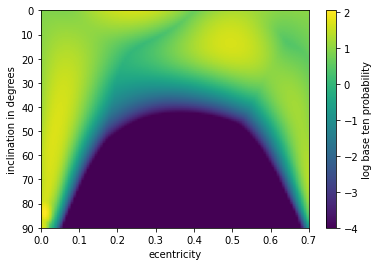

In [26]:
noplanetlikihood=np.exp(loglikelihood([0,120,0,90,
                                               4.6220554014026838e-01,1.6437004273382669e+00,
                                               10,1.40795,-90],actualbrucetransittime , bruceerr, yesplot= False)*-1)
print(noplanetlikihood)
planetlikihood = np.exp(-1*np.min(a, axis= 2))
fig,ax= plt.subplots()
im=ax.imshow(np.maximum(np.log10(planetlikihood/noplanetlikihood),-4 ),extent = [min(ecentricitiestotest), max(ecentricitiestotest),max(inclinationstotest),min(inclinationstotest)], aspect='auto')

fig.colorbar(im, label = 'log base ten probability')
ax.set_ylabel('inclination in degrees')
ax.set_xlabel('ecentricity')


In [27]:
print((np.log10(planetlikihood/noplanetlikihood)))

[[ 0.91361708  0.9135684   0.91298575 ...  0.98947026  0.99084349
   0.98711397]
 [ 0.92035173  0.92466747  0.92784476 ...  0.96841406  0.97270142
   0.97200581]
 [ 0.92701402  0.93563396  0.94252452 ...  0.94691387  0.95418999
   0.95661949]
 ...
 [ 1.6530822   1.59219619  1.19142254 ... -2.48570922 -1.45042909
  -0.40231967]
 [ 1.67461834  1.59118189  1.12662828 ... -2.84903573 -1.70561459
  -0.76480119]
 [ 1.71749054  1.60207611  1.06627192 ... -3.30016028 -2.02757828
  -0.98477525]]


In [28]:
print(noplanetlikihood)
print(planetlikihood)
print(np.min(a, axis = 2))

6.808982454326428e-07
[[5.58083644e-06 5.58021090e-06 5.57272955e-06 ... 6.64587971e-06
  6.66692703e-06 6.60991976e-06]
 [5.66805360e-06 5.72465986e-06 5.76669491e-06 ... 6.33134934e-06
  6.39416206e-06 6.38392863e-06]
 [5.75567462e-06 5.87105537e-06 5.96494902e-06 ... 6.02554161e-06
  6.12734317e-06 6.16171645e-06]
 ...
 [3.06312286e-05 2.66243126e-05 1.05804651e-05 ... 2.22522022e-09
  2.41353234e-08 2.69626485e-07]
 [3.21884860e-05 2.65622039e-05 9.11403095e-06 ... 9.63932200e-10
  1.34111997e-08 1.17025641e-07]
 [3.55281633e-05 2.72369408e-05 7.93147813e-06 ... 3.41131590e-10
  6.39004528e-09 7.05191325e-08]]
[[12.09617189 12.09628399 12.09762558 ... 11.92151349 11.91835152
  11.92693904]
 [12.08066478 12.07072742 12.06341145 ... 11.96999718 11.96012516
  11.96172688]
 [12.0653243  12.04547615 12.02961005 ... 12.01950319 12.00274932
  11.99715517]
 ...
 [10.39349053 10.53368575 11.45650117 ... 19.92340995 17.53958937
  15.12622823]
 [10.34390175 10.53602126 11.60569547 ... 20.7600

[315.90886837 332.80413679 360.96292936 384.89789415 391.93759056
 394.7534865  401.79315997 415.87255671 425.72812932 439.80752397
  79.375085   211.721367   280.710383   290.565959   314.500916  ]
[316.00580926 332.90753892 361.0770844  385.02118987 392.06348512
 394.88033544 401.92304753 416.0080755  425.86742199 439.95219789
  79.38083086 211.7781035  280.79339958 290.65294233 314.59733151]


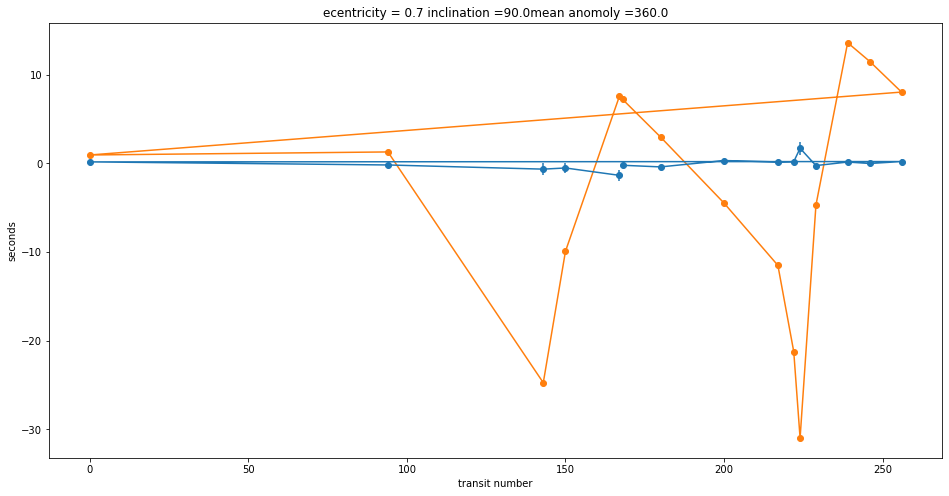

11955.49878647173
6.808982454326428e-07


In [29]:
test=loglikelihood([0.02,130,ecentricitiestotest[c],inclinationstotest[d],
                                               4.6220554014026838e-01,1.6437004273382669e+00,
                                               meananomolytotest[e],1.40795,-90],actualbrucetransittime , bruceerr, yesplot= True)
print(test)
print(noplanetlikihood)